In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import folium
import numpy as np

In [2]:
df = pd.read_csv('p2-arbres-fr.csv', delimiter=';')
df.head()

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,A,NaN,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60,8,A,NaN,48.857722,2.321006
4,99878,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,NaN,38,0,NaN,NaN,48.890435,2.315289


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200137 entries, 0 to 200136
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   200137 non-null  int64  
 1   type_emplacement     200137 non-null  object 
 2   domanialite          200136 non-null  object 
 3   arrondissement       200137 non-null  object 
 4   complement_addresse  30902 non-null   object 
 5   numero               0 non-null       float64
 6   lieu                 200137 non-null  object 
 7   id_emplacement       200137 non-null  object 
 8   libelle_francais     198640 non-null  object 
 9   genre                200121 non-null  object 
 10  espece               198385 non-null  object 
 11  variete              36777 non-null   object 
 12  circonference_cm     200137 non-null  int64  
 13  hauteur_m            200137 non-null  int64  
 14  stade_developpement  132932 non-null  object 
 15  remarquable      

In [6]:
duplicated_rows = df.duplicated()
if df[duplicated_rows].shape[0] == 0:
    print("Il n'y a pas de lignes en doublon")
else:
    print("Il y a des lignes en doubon")


Il n'y a pas de lignes en doublon


In [7]:
column = 'geo_point_2d_b'
missing_values = df[column].isnull().sum()
print(f"Nombre de valeurs manquantes dans la colonne {column} :", missing_values)

Nombre de valeurs manquantes dans la colonne geo_point_2d_b : 0


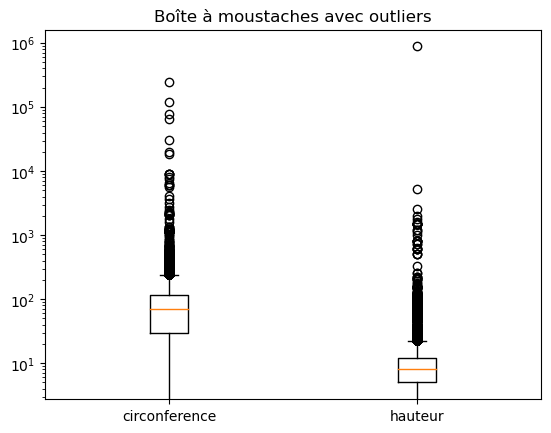

In [16]:
circonference = df['circonference_cm']
hauteur = df['hauteur_m']
plt.boxplot([circonference, hauteur]) 
plt.xticks([1, 2], ['circonference', 'hauteur'])
plt.yscale('log')
plt.title("Boîte à moustaches avec outliers")
plt.show()

In [11]:
df.groupby('stade_developpement')['circonference_cm'].max()

stade_developpement
A     250255
J       9035
JA      7540
M       2439
Name: circonference_cm, dtype: int64

In [21]:
print(round(df['circonference_cm'].max()/(100*2*np.pi)*2),'mètres')

797 mètres


In [3]:
df['libelle_francais'].value_counts()

libelle_francais
Platane       42508
Marronnier    25207
Tilleul       21305
Erable        18389
Sophora       11797
              ...  
Cordyline         1
Camphrier         1
Jujubier          1
Maackie           1
Garrya            1
Name: count, Length: 192, dtype: int64

In [19]:
print(round((1-df['stade_developpement'].dropna().shape[0]/df['stade_developpement'].shape[0])*100,1)
      ,'% de valeurs manquantes dans "stade_developpement"')

33.6 % de valeurs manquantes dans "stade_developpement"


Il y a beaucoup de valeurs manquantes dans cette colonne, elle va être difficilement exploitable. Il faut soit établir une stratégie d'imputation pour compléter les valeurs manquantes, soit abandonner cette colonne.